<a href="https://colab.research.google.com/github/09aryan/MEME_CLASSIFICATION_USING_SENTIMENT_ANALYSIS/blob/main/resNet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import csv
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from google.colab import drive

def process_image(img_path, model, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = tf.image.resize(img_array, (299, 299))
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    features = model.predict(img_array)

    if tf.rank(features) == 4:
        features = tf.reduce_mean(features, axis=(1, 2))
    else:
        # Handle the case where the features have only 2 dimensions
        features = tf.reduce_mean(features, axis=1)

    return features.numpy().tolist()

def process_images_in_colab(model, folder_path, target_size=(299, 299), batch_size=32):
    image_data = []
    img_paths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)
                 if filename.endswith((".jpg", ".jpeg", ".png"))]

    start_time = time.time()

    for i, img_path in enumerate(img_paths):
        try:
            features = process_image(img_path, model, target_size=target_size)

            image_data.append({
                'ImageName': os.path.basename(img_path),
                'Features': features
            })

            if (i + 1) % batch_size == 0:
                elapsed_time = time.time() - start_time
                print(f"Processed {i + 1} images in {elapsed_time:.2f} seconds")

        except Exception as e:
            print(f"Error processing image {img_path}: {str(e)}")

    return image_data

def save_to_csv(image_data, csv_file_name):
    with open(csv_file_name, mode='w', newline='') as csvfile:
        fieldnames = ['ImageName', 'Features']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for data in image_data:
            writer.writerow(data)

drive.mount('/content/drive')

# Use Inception-ResNet-v2 instead of InceptionV3
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(2048, activation='linear')(x)

model = Model(inputs=base_model.input, outputs=output)

folder_path = '/content/drive/MyDrive/image'
image_data = process_images_in_colab(model, folder_path, target_size=(299, 299), batch_size=32)
csv_file_name = '/content/drive/MyDrive/image_data_fine_tuned3.csv'
save_to_csv(image_data, csv_file_name)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 341ms/step
Processed 32 images in 28.43 seconds
1/1 [==============================] - 0s 343ms/step
Processed 64 images in 55.32 seconds
1/1 [==============================] - 0s 348ms/step
Processed 96 images in 156.15 seconds
1/1 [==============================] - 0s 341ms/step
Processed 128 images in 175.44 seconds
1/1 [==============================] - 0s 334ms/step
Processed 160 images in 194.15 seconds
1/1 [==============================] - 0s 339ms/step
Processed 192 images in 212.06 seconds
1/1 [==============================] - 0s 346ms/step


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 333ms/step
Processed 2144 images in 1333.63 seconds
1/1 [==============================] - 0s 345ms/step
Error processing image /content/drive/MyDrive/image/image_5119.png: image file is truncated
1/1 [==============================] - 0s 349ms/step
Processed 2176 images in 1350.92 seconds
1/1 [==============================] - 0s 344ms/step
Processed 2208 images in 1368.86 seconds
1/1 [==============================] - 0s 474ms/step
Processed 2240 images in 1386.85 seconds
1/1 [==============================] - 0s 343ms/step
Processed 2272 images in 1405.67 seconds
1/1 [==============================] - 0s 343ms/step
Processed 2304 images in 1423.35 seconds
1/1 [==============================] - 0s 347ms/step
Processed 2336 images in 1440.54 seconds
1/1 [==============================] - 1s 501ms/step
Processed 2368 images in 1459.92 seconds
1/1 [==============================] - 0s 348ms/step

Epoch 1/50
45/45 [==============================] - 7s 32ms/step - loss: 1.5764 - accuracy: 0.3727 - val_loss: 1.5774 - val_accuracy: 0.4350
Epoch 2/50
45/45 [==============================] - 1s 20ms/step - loss: 1.5636 - accuracy: 0.4005 - val_loss: 1.5649 - val_accuracy: 0.4350
Epoch 3/50
45/45 [==============================] - 1s 21ms/step - loss: 1.5495 - accuracy: 0.4171 - val_loss: 1.5518 - val_accuracy: 0.4350
Epoch 4/50
45/45 [==============================] - 1s 21ms/step - loss: 1.5362 - accuracy: 0.4263 - val_loss: 1.5377 - val_accuracy: 0.4350
Epoch 5/50
45/45 [==============================] - 1s 18ms/step - loss: 1.5204 - accuracy: 0.4299 - val_loss: 1.5229 - val_accuracy: 0.4350
Epoch 6/50
45/45 [==============================] - 1s 21ms/step - loss: 1.5048 - accuracy: 0.4389 - val_loss: 1.5076 - val_accuracy: 0.4350
Epoch 7/50
45/45 [==============================] - 1s 25ms/step - loss: 1.4895 - accuracy: 0.4335 - val_loss: 1.4922 - val_accuracy: 0.4350
Epoch 8/50
45

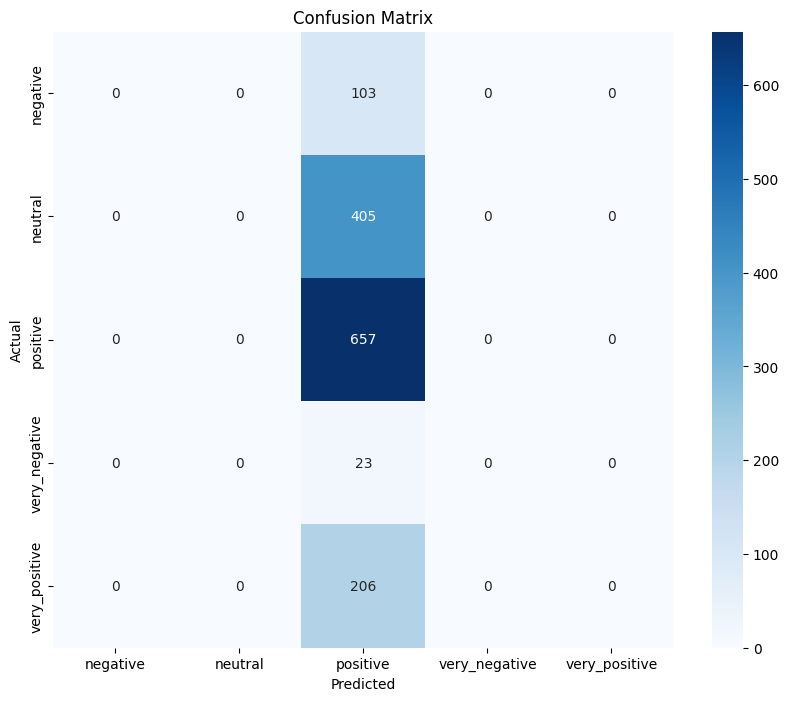

Classification Report:
               precision    recall  f1-score   support

     negative       0.00      0.00      0.00       103
      neutral       0.00      0.00      0.00       405
     positive       0.47      1.00      0.64       657
very_negative       0.00      0.00      0.00        23
very_positive       0.00      0.00      0.00       206

     accuracy                           0.47      1394
    macro avg       0.09      0.20      0.13      1394
 weighted avg       0.22      0.47      0.30      1394

F1 Score: 0.3019
Precision: 0.2221
Recall: 0.4713


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset
df = pd.read_csv('/content/drive/MyDrive/combined_data.csv')

# Preprocess the sentiment labels for multi-class classification
le = LabelEncoder()
df['overall_sentiment'] = le.fit_transform(df['overall_sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.vstack(df['Features'].apply(eval).values), df['overall_sentiment'].values, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a sentiment analysis model for multi-class classification
num_classes = len(le.classes_)
model = Sequential([
    Dense(512, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and get training history
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=100, validation_split=0.2)

# Evaluate the model
accuracy = model.evaluate(X_test_scaled, y_test)[1]
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Print Training Accuracy
train_accuracy = history.history['accuracy'][-1]
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Predictions on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Classification Report:")
print(class_report)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
